# Численная модель с учётом сопротивления воздуха

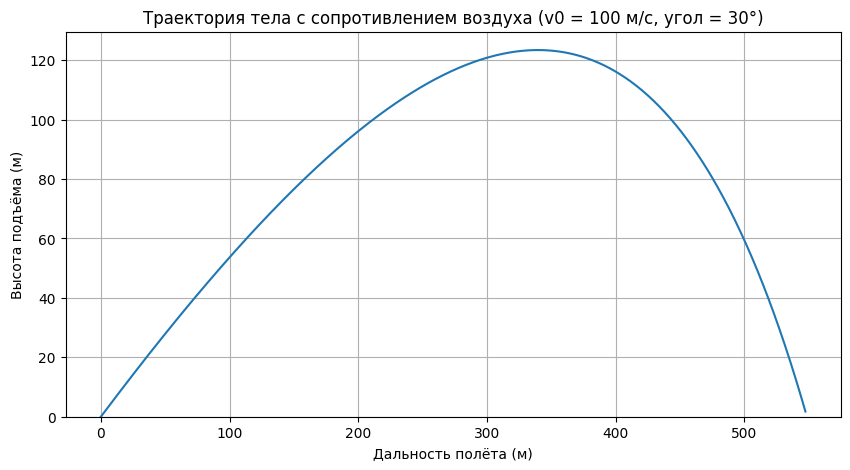

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

g = 9.8  # Ускорение свободного падения

def ode_system(t, y, a, b):
    X, Y, Vx, Vy = y
    dXdt = Vx
    dYdt = Vy
    dVxdt = -a * Vx
    dVydt = -g - b * Vy
    return [dXdt, dYdt, dVxdt, dVydt]

def solve_ode(angle, v, a, b, t_span=[0, 10], num_points=500):
    angle_rad = np.radians(angle)
    Vx0 = v * np.cos(angle_rad)
    Vy0 = v * np.sin(angle_rad)
    initial_conditions = [0, 0, Vx0, Vy0]

    t_eval = np.linspace(t_span[0], t_span[1], num_points)
    solution = solve_ivp(ode_system, t_span, initial_conditions, args=(a, b), t_eval=t_eval)

    return solution.t, solution.y[0], solution.y[1], solution.y[2], solution.y[3]

def plot_trajectory_ode(t, X, Y, v0, angle, save_path=None):
    plt.figure(figsize=(10, 5))
    plt.plot(X, Y)
    plt.title(f'Траектория тела с сопротивлением воздуха (v0 = {v0} м/с, угол = {angle}°)')
    plt.xlabel('Дальность полёта (м)')
    plt.ylabel('Высота подъёма (м)')
    plt.ylim(bottom=0)
    plt.grid(True)

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# Пример использования
angle = 30  # Угол в градусах
v = 100  # Скорость в м/с
a = 0.1  # Линейный коэффициент сопротивления
b = 0.01  # Квадратичный коэффициент сопротивления

# Решение с учётом сопротивления
t, X, Y, Vx, Vy = solve_ode(angle, v, a, b)
plot_trajectory_ode(t, X, Y, v, angle)